In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
def scaleFeatures(vector):
    max_val = max(vector)
    min_val = min(vector)
    for i in range(len(vector)):
        vector[i] = (vector[i]-min_val)/(max_val-min_val)
    return vector

In [4]:
def createDataSets():
    # Specify the path to your CSV file
    csv_file_path = 'heart.csv'

    # Initialize lists to store the labels, row vector, and the remaining float values
    Features_names = []
    Y_train = []
    X_train = []

    # Open the CSV file
    with open(csv_file_path, mode='r') as file:
        # Create a CSV reader object
        csv_reader = csv.reader(file)
        
        # Read the first row as labels
        Features_names = next(csv_reader)
        
        # Iterate over the remaining rows in the CSV file
        for row in csv_reader:
            Y_train.append(float(row[-1]))  # Append the first column value to the row vector and convert to float
            trainEg = [float(value) for value in row[0:-1]]  # Convert the remaining values to floats
            X_train.append(trainEg)

    # Convert lists to numpy arrays
    Y_train = np.array(Y_train)
    X_train = np.array(X_train)
    # col 1 4 5 8 
    col1=[]
    col4=[]
    col5=[]
    col8=[]
    for i in range(len(X_train)):
        col1.append(X_train[i][0])
        col4.append(X_train[i][3])
        col5.append(X_train[i][4])
        col8.append(X_train[i][7])
    col1 = np.array(col1)
    col1 = scaleFeatures(col1)
    col4 = np.array(col4)
    col4 = scaleFeatures(col4)
    col5 = np.array(col5)
    col5 = scaleFeatures(col5)
    col8 = np.array(col8)
    col8 = scaleFeatures(col8)
    for i in range(len(X_train)):
        X_train[i][0] = col1[i]
        X_train[i][3] = col4[i]
        X_train[i][4] = col5[i]
        X_train[i][7] = col8[i]
    return Y_train,X_train




In [5]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [6]:
def predict(X_pred, w,b):
    z = np.dot(X_pred, w) + b
    f = sigmoid(z)
    print(f)
    return( (f >= 0.5).astype(int))

In [7]:
def cost(w,b,X,y):
    Cost =0
    m = len(y)
    for i in range(m):
        z_i = np.dot(w,X[i])+b
        f_wb_i = sigmoid(z_i)
        Cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    Cost/=m
    return Cost



In [8]:
# UNQ_C5
def cost_reg(X, y, w, b, lambda_ = 1):


    m, n = X.shape
    cost_without_reg = cost(X, y, w, b) 

    reg_cost = 0.

    for j in range(n):
        reg_cost_j =w[j]*w[j]
        reg_cost = reg_cost + reg_cost_j
    reg_cost = (lambda_/(2 * m)) * reg_cost

    total_cost = cost_without_reg + reg_cost

    return total_cost

In [9]:
def gradientDescent(X_train, Y_train, w,b):
    m, n = X_train.shape
    dw = np.zeros(w.shape)
    db = 0.

    for i in range (m):
        f= sigmoid(np.dot(X_train[i],w)+b)
        
        dbi=(f-Y_train[i])
        db+=dbi
        for j in range(n):
            dwij = (f- Y_train[i])*X_train[i][j]
            dw[j]+= dwij

    dw/=m
    db/=m
    return dw,db

In [10]:
# UNQ_C6
def gradient_reg(X, y, w, b, lambda_ = 1): 
    m, n = X.shape
    
    dj_db, dj_dw = gradientDescent(X, y, w, b)
   
    for j in range(n): 

          dj_dw_j_reg = w[j]*lambda_/m

         
          dj_dw[j] = dj_dw[j] + dj_dw_j_reg

    return dj_db, dj_dw

In [11]:
def optimize(num_iters, X_train, Y_train, learning_rate):
    n=X_train.shape[1]
    w = np.zeros(n, dtype=float)
    b = 0.0
    iterations =[]
    costs =[]
    for k in range(num_iters):
        dw, db = gradientDescent(X_train, Y_train, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db
        if (k % 100 == 0):
            iterations.append(k)
            thiscost = cost(w, b, X_train, Y_train)
            costs.append(thiscost)

            print(f"Iteration {k}: Cost {thiscost}")
    return w, b , iterations, costs

In [13]:
def model():
    Y_train, X_train = createDataSets()
    w, b, iterations, costs = optimize(1000,X_train, Y_train, 0.08)
    plt.plot(iterations,costs)
    plt.show()
    X_pred =np.array([0.41666667 ,1,1, 0.33962264 ,0.3196347  ,0,1,0.76335878 ,0,0.6,2,0,2])
    print(predict(X_pred,w,b))
    

Iteration 0: Cost 0.6785348356681891
Iteration 100: Cost 0.41488481366821084
Iteration 200: Cost 0.3934135939084664
Iteration 300: Cost 0.38459461832221675
Iteration 400: Cost 0.3793427993167487
Iteration 500: Cost 0.37575563990664956
Iteration 600: Cost 0.3731171950477287
Iteration 700: Cost 0.37107187628117894
Iteration 800: Cost 0.36941916859405977
Iteration 900: Cost 0.36803834121544643


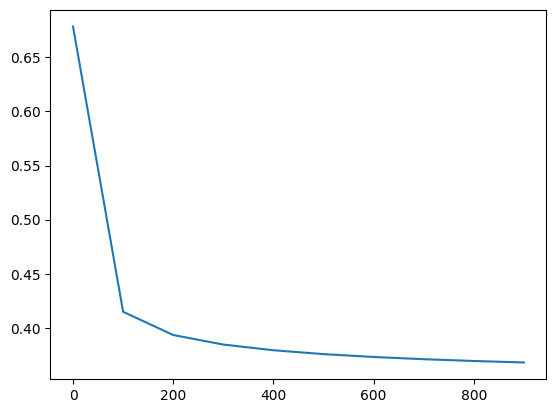

0.8851164321793351
1


In [14]:
model()